In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import os

In [2]:
patient_data = pd.read_csv(
    '.\Respiratory_Sound_Database\patient_diagnosis.csv',
    names = ['pid', 'disease']
)

In [3]:
patient_data.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [6]:
path = './Respiratory_Sound_Database/audio_and_txt_files/'
file_names = [s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
file_names[:9]

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200',
 '104_1b1_Ar_sc_Litt3200',
 '104_1b1_Ll_sc_Litt3200',
 '104_1b1_Lr_sc_Litt3200',
 '104_1b1_Pl_sc_Litt3200']

In [7]:
files_data=[]
for file in file_names:
    data = pd.read_csv(path + file + '.txt', sep = '\t', names = ['start', 'end', 'crackles', 'weezels'])
    data['pid'] = file.split('_')[0]
    data['filename'] = file
    files_data.append(data)

files_df=pd.concat(files_data)
files_df.reset_index()
files_df

,start,end,crackles,weezels,pid,filename
0,0.036,0.579,0,0,101,101_1b1_Al_sc_Meditron
1,0.579,2.450,0,0,101,101_1b1_Al_sc_Meditron
2,2.450,3.893,0,0,101,101_1b1_Al_sc_Meditron
3,3.893,5.793,0,0,101,101_1b1_Al_sc_Meditron
4,5.793,7.521,0,0,101,101_1b1_Al_sc_Meditron
...,...,...,...,...,...,...
6,11.721,13.693,1,0,226,226_1b1_Pl_sc_LittC2SE
7,13.693,15.536,0,0,226,226_1b1_Pl_sc_LittC2SE
8,15.536,17.493,0,0,226,226_1b1_Pl_sc_LittC2SE
9,17.493,19.436,1,0,226,226_1b1_Pl_sc_LittC2SE


In [9]:
patient_data.pid = patient_data.pid.astype('int32')
files_df.pid = files_df.pid.astype('int32')
data = pd.merge(files_df, patient_data, on = 'pid')
data

,start,end,crackles,weezels,pid,filename,disease
0,0.036,0.579,0,0,101,101_1b1_Al_sc_Meditron,URTI
1,0.579,2.450,0,0,101,101_1b1_Al_sc_Meditron,URTI
2,2.450,3.893,0,0,101,101_1b1_Al_sc_Meditron,URTI
3,3.893,5.793,0,0,101,101_1b1_Al_sc_Meditron,URTI
4,5.793,7.521,0,0,101,101_1b1_Al_sc_Meditron,URTI
...,...,...,...,...,...,...,...
6893,11.721,13.693,1,0,226,226_1b1_Pl_sc_LittC2SE,Pneumonia
6894,13.693,15.536,0,0,226,226_1b1_Pl_sc_LittC2SE,Pneumonia
6895,15.536,17.493,0,0,226,226_1b1_Pl_sc_LittC2SE,Pneumonia
6896,17.493,19.436,1,0,226,226_1b1_Pl_sc_LittC2SE,Pneumonia


D:\Program\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

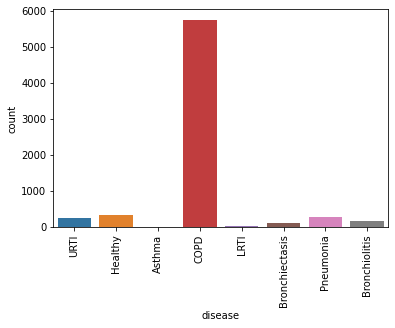

In [10]:
sns.countplot(data.disease)
plt.xticks(rotation = 90)

<AxesSubplot:ylabel='pid'>

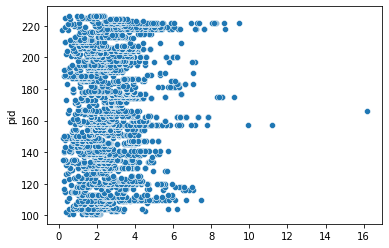

In [11]:
sns.scatterplot(x = (data.end - data.start), y = data.pid)

In [12]:
np.mean(data.end - data.start)

2.7005090852420994